# **0. Import libraries**

First we have to import some useful libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split



*   `pandas` library offers data structures and operations for manipulating numerical tables and time series.
*   `numpy` library has a large collection of high-level mathematical functions to operate on arrays and matrices.
* `matplotlib` library is used for creating interactive visualizations in Python like plotting graphs.
* `sklearn` library supports building prediction models by applying many mathematical functions, specifically Linear Regression and Polynomial Regression.


# **1. Data Collecting**

##**1.1 Get raw data**

Our data will be stored in a `.csv` file, we will get and read data from the link below:

In [ ]:
data_path = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(data_path)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101330,ZWE,Africa,Zimbabwe,2021-07-05,56014.0,1540.0,1247.143,1911.0,33.0,23.143,3768.706,103.614,83.910,128.575,2.220,1.557,1.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3635.0,687102.0,46.229,0.245,7581.0,0.510,0.165,6.1,tests performed,1369436.0,797715.0,571721.0,8226.0,10040.0,9.21,5.37,3.85,676.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101331,ZWE,Africa,Zimbabwe,2021-07-06,57963.0,1949.0,1347.143,1939.0,28.0,25.429,3899.837,131.132,90.638,130.459,1.884,1.711,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10598.0,697700.0,46.942,0.713,7830.0,0.527,0.172,5.8,tests performed,1382567.0,807633.0,574934.0,13131.0,9567.0,9.30,5.43,3.87,644.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101332,ZWE,Africa,Zimbabwe,2021-07-07,60227.0,2264.0,1480.429,1973.0,34.0,26.286,4052.163,152.325,99.605,132.746,2.288,1.769,1.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10362.0,708062.0,47.639,0.697,7782.0,0.524,0.190,5.3,tests performed,1398757.0,819058.0,579699.0,16190.0,9474.0,9.41,5.51,3.90,637.0,NaN,14862927

`describe()` will give a brief descriptive statistics about our data.

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.758900e+04,97586.000000,96576.000000,8.740100e+04,87557.000000,96576.000000,97070.000000,97067.000000,96062.000000,86895.000000,87051.000000,96062.000000,81672.000000,10243.000000,10243.000000,12722.000000,12722.000000,927.000000,927.000000,1589.000000,1589.000000,4.551700e+04,4.518500e+04,45185.000000,45517.000000,5.297100e+04,52971.000000,49510.000000,48912.000000,1.739100e+04,1.655200e+04,1.367800e+04,1.449800e+04,3.030200e+04,17391.000000,16552.000000,13678.000000,30302.000000,84736.000000,1.006820e+05,94130.000000,90494.000000,89478.000000,89994.000000,90852.000000,61288.000000,90866.000000,93222.000000,71056.000000,70019.000000,45658.000000,82756.000000,96227.000000,91005.000000,3571.000000
mean,1.094247e+06,6047.005052,6065.952194,2.943026e+04,146.170209,131.731618,13493.756782,76.226162,76.430968,297.007835,1.548224,1.395345,1.003986,1044.254515,25.911782,4539.697846,165.988323,260.884761,19.956874,3475.766003,106.755065,4.837856e+04,8.012238e+06,322.822021,2.149033,4.592062e+04,2.059941,0.088428,164.340516,3.390815e+07,1.881317e+07,1.048003e+07,6.986466e+05,3.357545e+05,25.469248,16.582188,10.590806,3297.895089,58.215358,1.245047e+08,387.139455,30.557468,8.786426,5.562196,19280.030393,13.415879,258.563508,7.932725,10.566958,32.699353,50.823296,3.027102,73.237887,0.727261,18.251563
std,7.476858e+06,37722.466795,37443.852542,1.756569e+05,799.412231,743.287483,24647.811727,200.334332,158.591641,534.406573,3.953737,3.029585,0.352832,2856.026474,26.928700,11729.951372,208.908536,556.270223,35.042358,10701.034750,213.075205,1.769832e+05,3.483771e+07,760.157772,5.986772,1.614653e+05,5.093886,0.097166,886.987824,1.824155e+08,1.023085e+08,5.148069e+07,3.285759e+06,2.227666e+06,32.093820,19.067403,14.426056,4552.078432,21.008447,6.793658e+08,1803.846117,9.130687,6.209717,4.236033,19998.797336,19.963878,119.059777,4.154360,10.466462,13.487439,31.758441,2.458228,7.557479,0.150350,35.848993
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.316000e+03,2.000000,7.571000,5.500000e+01,0.000000,0.000000,265.769000,0.218500,1.304000,8.105000,0.000000,0.000000,0.840000,31.000000,4.749000,115.000000,22.969250,8.000000,1.797000,48.448000,9.315000,1.688000e+03,1.668850e+05,14.754000,0.146000,1.769000e+03,0.145000,0.016000,7.700000,1.294240e+05,1.000752e+05,5.228200e+04,4.682250e+03,8.740000e+

## **1.2 Take useful features for analysing data**



- location (to get the country name)
- date
- new_cases



In [ ]:
features_data = ['location','date','new_cases']
data_analyze = df[features_data]
data_analyze

,location,date,new_cases
0,Afghanistan,2020-02-24,1.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0
...,...,...,...
101330,Zimbabwe,2021-07-05,1540.0
101331,Zimbabwe,2021-07-06,1949.0
101332,Zimbabwe,2021-07-07,2264.0
101333,Zimbabwe,2021-07-08,2156.0


## 1.3 Fix `NaN` cells

`NaN` cells are the cells that have missing data.

There are many ways to fix `NaN` cells. In this part, we will fix them by replace `NaN` with `0`.

In [ ]:
for columns in data_analyze.columns:
    data_analyze[columns].fillna(0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


## 1.4 Get data of the specific object

To have an overview of the pandemic, we will analyze the general data of the entire ***World***.

Therefore, we have to filter out `World` in feature `location`.

In [ ]:
global_data = data_analyze[data_analyze['location']=='World']
global_data

,location,date,new_cases
99388,World,2020-01-22,0.0
99389,World,2020-01-23,98.0
99390,World,2020-01-24,286.0
99391,World,2020-01-25,492.0
99392,World,2020-01-26,685.0
...,...,...,...
99918,World,2021-07-05,371772.0
99919,World,2021-07-06,453745.0
99920,World,2021-07-07,463849.0
99921,World,2021-07-08,481535.0


## **1.5 Sort by *Month*** 

For display efficiency, we will group data into months, and calculate the total of new cases of each month.

First we will take out data from 2020/07 to 2020/12, the period before we used the vaccine.

In [ ]:
global_data['year-month'] = global_data['date'].apply(lambda x: str(x[:4]) + '-' + str(x[5:7]))
global_data = global_data.loc[:,('year-month','new_cases')]
global_data = global_data.groupby('year-month').sum()
# The period before we used the vaccine
global_data1 = global_data[6:17]
global_data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,new_cases
year-month,
2020-07,7146823.0
2020-08,7904329.0
2020-09,8502664.0
2020-10,12130624.0
2020-11,17268663.0
2020-12,19326166.0
2021-01,19469170.0
2021-02,11152787.0
2021-03,14718163.0


And from 2021/01 to 2021/05, when we started using vaccine.

In [ ]:
global_data2 = global_data[12:17]
global_data2

,new_cases
year-month,
2021-01,19469170.0
2021-02,11152787.0
2021-03,14718163.0
2021-04,22502768.0
2021-05,19676768.0


#**2. Data analysis**

## **2.1 Plot the data**

First we have to plot the data by drawing a mixed chart - a combination of a bar chart and a line graph.

Text(0, 0.5, 'New cases (cases)')

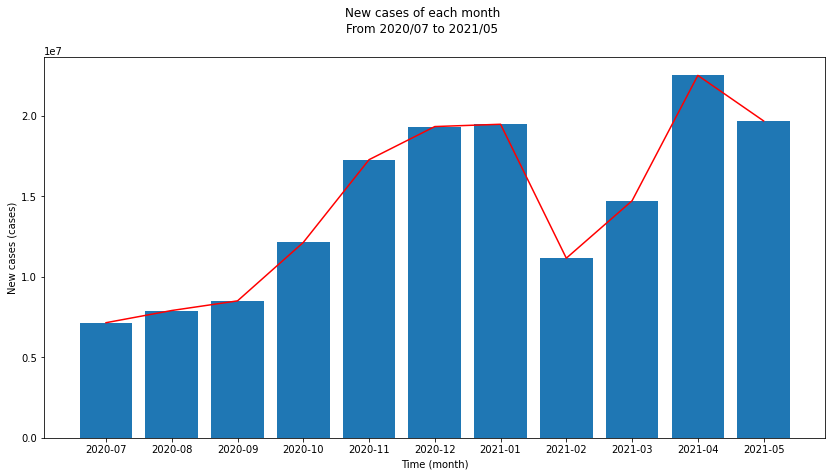

In [ ]:
fig_world, (ax1) = plt.subplots(1, 1,figsize=(14,7))
fig_world.suptitle("New cases of each month\nFrom 2020/07 to 2021/05")
ax1.bar(global_data1.index,global_data1['new_cases'])
ax1.plot(global_data1.index,global_data1['new_cases'],'r-')
#ax1.set_title("New cases of each month\nFrom 2020/07 to 2020/12")
ax1.set_xlabel('Time (month)')
ax1.set_ylabel('New cases (cases)')

## **2.2 Analysis data**

From July 2020 to December 2020, the tendency seemingly resembles a normal distribution in which two conditions remained unchanged – the spread of the virus and the quick calls for lockdowns worldwide. In January 2021, the figure followed the normal distribution. However, the effect of mass vaccination started to show. Expectedly, the number in February 2021 should be similar to that in November 2020. Nonetheless, the figure was significantly lower, which is a clear indicator of the effects of vaccination and lockdowns at the same time. In the first two months of 2021, the tendency follows an exponential distribution. However, the number climbed drastically in the next two months, following the trajectory of a gamma distribution with K= 7,5 and theta=1.0. This sudden surge may result from lagging vaccination campaigns worldwide and too-soon reopens in multiple countries. However, a decline was reported again in May 2021, indicating that more lockdowns and successful vaccinations had occurred. 

# **3. Model prediction**

## **3.1 Function to do math**

Applying the theory about *linear regression* and *polynomial regression*, now we will build a function called `doMath` to do the math stuff.

This function receives 3 parameters:
*   The training sets (`x, y`)
*   Number of days after 1 week and 3 months (`ow_norm, tm_norm`)
*   Identified parameter (`check`)

And it will return 4 parameters:
* Poly Regression function (`poly_re`)
* Linear Regression function (`lin_re`)
* Total cases predicted after 1 week and 3 months (`ow_re, tm_re`)
* Accuracy of the model(`BestAccuracy`)


In [ ]:
def doMath(x,y,ow_norm,tm_norm,check):
    # Initialize accuracy
    BestAccuracy=0
    # We evaluate the accuracy by splitting the data into 2 parts:
    # 80% of them will be used for training and 20% will be used for testing
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)
    # Create return values of Poly Regression, Linear Regression and 2 predicted values.
    poly_re = PolynomialFeatures()
    lin_re = LinearRegression()
    ow_re = 0
    tm_re = 0
    # This algorithm uses for-loop to find the degree 'i' of the prediction line that best suits the training sets.
    for i in range(2,51):
        poly_reg = PolynomialFeatures(degree = i)
        # Train data  
        x_poly_train = poly_reg.fit_transform(x_train)  
        x_poly_test = poly_reg.fit_transform(x_test)
        # Create Linear and Poly function based on the trained data 
        lin_reg = LinearRegression()  
        lin_reg.fit(x_poly_train, y_train) 
        lin_reg_t = LinearRegression()
        lin_reg_t.fit(x_train,y_train)
        # We will use Poly Regression model to predict the total cases after one week, since this model can produce the best result in the near future
        # We will use Linear Regression model to predict the total cases after three months, since Poly model can be overfitted and gives an unreasonable result.
        ow = lin_reg.predict(poly_reg.fit_transform(ow_norm))[0]
        tm = lin_reg_t.predict(tm_norm)[0]
        # Calculate the accuracy
        temp = lin_reg.score(x_poly_test,y_test)
        if(check == 1 and temp > BestAccuracy):
            poly_re = poly_reg
            lin_re = lin_reg
            BestAccuracy=temp
            ow_re = ow
            tm_re = tm
        if(check == 2 and tm>ow and ow>1):
            poly_re = poly_reg
            lin_re = lin_reg
            BestAccuracy=temp
            ow_re = ow
            tm_re = tm
    return [poly_re, lin_re, ow_re,tm_re, BestAccuracy]

## **3.2 Global**

### **a/ Building model**

Now we will build a model to predict COVID-19 situation of the World

First we will get raw data from open source, then clean the data by taking out the useful features

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df = df[df['location'] == 'World']
df = df.loc[:,('location','date','new_cases','total_cases','people_vaccinated_per_hundred')]
local_model = df.copy()
n = len(local_model.index)
inde = np.array([x for x in range(n)])
local_model['indexx'] = inde

We need to consider data from the day we started using vaccine until today, which is 2021/06/09, so we will slice the dataframe in this period.

Then we will add a new column called `days`, this column presents number of days.

In [ ]:
#We will consider data from the day we started using vaccine until today, which is 2021-06-09.
ind = local_model.loc[local_model['date'] == '2021-06-09', 'indexx'].values[0]
local_model = local_model.iloc[:ind+1]
local_model.dropna(subset=["people_vaccinated_per_hundred"],axis = 0, inplace = True)
#Add a new column called "days", this column presents the number of days.
d = len(local_model.index)
day = np.array([x for x in range(d)])
local_model['days'] = day
nc_min = local_model['new_cases'].min()
nc_max = local_model['new_cases'].max()
dis = local_model.loc[:,('location','date','new_cases','total_cases','people_vaccinated_per_hundred','days')]
dis

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
99703,World,2020-12-02,651735.0,64675043.0,0.00,0
99704,World,2020-12-03,694136.0,65369179.0,0.00,1
99705,World,2020-12-04,683135.0,66052314.0,0.00,2
99706,World,2020-12-05,642432.0,66694746.0,0.00,3
99707,World,2020-12-06,538995.0,67233741.0,0.00,4
...,...,...,...,...,...,...
99888,World,2021-06-05,398267.0,172988179.0,11.57,185
99889,World,2021-06-06,322691.0,173310870.0,11.71,186
99890,World,2021-06-07,321305.0,173632175.0,11.84,187
99891,World,2021-06-08,366820.0,173998995.0,12.00,188


Now we will normalize data.

Normalizing data is the process that adjust the range of all training sets to 0-1.

The purpose of normalizing data is for the ease of calculating, as well as increasing the effect of visual display.

In [ ]:
#Step 2: Normalize the data
local_cop = local_model.loc[:,('new_cases','total_cases','people_vaccinated_per_hundred','days')]
local_cop['people_vaccinated_per_hundred']=(local_model['people_vaccinated_per_hundred']-local_model['people_vaccinated_per_hundred'].min())/(local_model['people_vaccinated_per_hundred'].max()-local_model['people_vaccinated_per_hundred'].min())
local_cop['new_cases']=(local_model['new_cases']-local_model['new_cases'].min())/(local_model['new_cases'].max()-local_model['new_cases'].min())
local_cop['total_cases']=(local_model['total_cases']-local_model['total_cases'].min())/(local_model['total_cases'].max()-local_model['total_cases'].min())
local_cop['days']=(local_model['days']-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
local_cop 

,new_cases,total_cases,people_vaccinated_per_hundred,days
99703,0.591684,0.000000,0.000000,0.000000
99704,0.659770,0.006325,0.000000,0.005291
99705,0.642105,0.012550,0.000000,0.010582
99706,0.576746,0.018404,0.000000,0.015873
99707,0.410651,0.023315,0.000000,0.021164
...,...,...,...,...
99888,0.184675,0.986967,0.948361,0.978836
99889,0.063318,0.989907,0.959836,0.984127
99890,0.061093,0.992835,0.970492,0.989418
99891,0.134179,0.996178,0.983607,0.994709


After normalizing data, we will create the 'training sets':
* training sets 1(`x1,y1`) are the number of `new cases` per day with respect to the `percentage of population vaccinated`.
* training sets 2(`x2,y2`) are the number of `total cases` with respect to number of `days`.

In [ ]:
x1 = local_cop.drop(['total_cases','new_cases','days'],axis = 1)
y1 = local_cop.new_cases
x2 = local_cop.drop(['total_cases','new_cases','people_vaccinated_per_hundred'],axis = 1)
y2 = local_cop.total_cases

Then, we will create the `input`.

`input` is the number of days from today until 1 week later and 3 months later.

We will use `input` to predict the pandemic situation after 1 week and 3 months.

In [ ]:
ow = np.array([d+7])
tm = np.array([d+30*3])
#Normalize the input
ow_norm = (ow[0]-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
tm_norm = (tm[0]-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
ow_norm = ow_norm.reshape(1,-1)
tm_norm = tm_norm.reshape(1,-1)

The data is ready, now we will use the function `BuildModel` that we have built above to get the Regression functions.

In [ ]:
[poly_reg_1, lin_reg_1, ow_re_1,tm_re_1, accuracy_n] = doMath(x1,y1,ow_norm,tm_norm,check = 1)
[poly_reg_2, lin_reg_2, ow_re_2,tm_re_2, accuracy_t] = doMath(x2,y2,ow_norm,tm_norm,check = 2)

We got the Regression functions, now we will use these functions to plot graphs

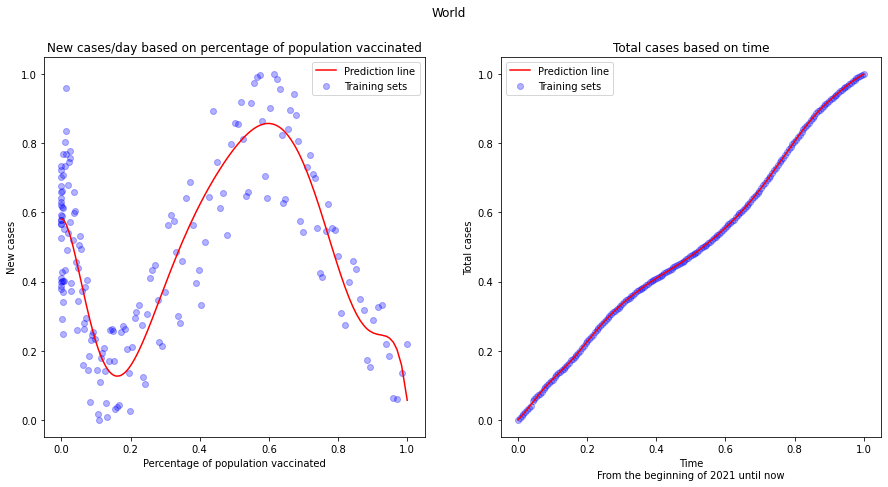

In [ ]:
# Step 6: In this stage, we will plot the graphs based on the model that we have built
fig_model, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
fig_model.suptitle('World')
# ax1 is the graph that illustrates new cases/day based on percentage of population vaccinated
ax1.scatter(x1,y1,color="blue",alpha=0.3)  
ax1.plot(x1, lin_reg_1.predict(poly_reg_1.fit_transform(x1)), color="red") 
ax1.set_title("New cases/day based on percentage of population vaccinated")
ax1.set_xlabel('Percentage of population vaccinated')
ax1.set_ylabel('New cases')
ax1.legend(['Prediction line','Training sets'])

# ax2 is the graph that illustrates total cases based on time.
ax2.scatter(x2,y2,color="blue",alpha=0.3)  
ax2.plot(x2, lin_reg_2.predict(poly_reg_2.fit_transform(x2)), color="red")
ax2.set_title("Total cases based on time")
ax2.set_xlabel('Time\nFrom the beginning of 2021 until now')
ax2.set_ylabel('Total cases')
ax2.legend(['Prediction line','Training sets'])

Finally, we predict the total cases of the World after one week and three months.

We also calculate the accuracy of the model.

In [ ]:
# Step 7: Print on screen the number of cases that we have predicted, as well as the accuracy of model
# First we have to bring the data back to their original state (since we have normalized data previously)
ow_re_2 = ow_re_2*(local_model['total_cases'].max()-local_model['total_cases'].min())+local_model['total_cases'].min()
tm_re_2 = tm_re_2*(local_model['total_cases'].max()-local_model['total_cases'].min())+local_model['total_cases'].min()
# Finally, print the data
display(dis)
print("Maximum value of new cases per day: ",nc_max)
print("Minimum value of new cases per day: ", nc_min)
print("After one week, total cases of the World will reach:",int(ow_re_2),'cases')
print("After three months, total cases of the World will reach:",int(tm_re_2),'cases')
print("Accuracy of this prediction model:",accuracy_t*100,"%")

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
99703,World,2020-12-02,651735.0,64675043.0,0.00,0
99704,World,2020-12-03,694136.0,65369179.0,0.00,1
99705,World,2020-12-04,683135.0,66052314.0,0.00,2
99706,World,2020-12-05,642432.0,66694746.0,0.00,3
99707,World,2020-12-06,538995.0,67233741.0,0.00,4
...,...,...,...,...,...,...
99888,World,2021-06-05,398267.0,172988179.0,11.57,185
99889,World,2021-06-06,322691.0,173310870.0,11.71,186
99890,World,2021-06-07,321305.0,173632175.0,11.84,187
99891,World,2021-06-08,366820.0,173998995.0,12.00,188


Maximum value of new cases per day:  906017.0
Minimum value of new cases per day:  283259.0
After one week, total cases of the World will reach: 196154290 cases
After three months, total cases of the World will reach: 225357379 cases
Accuracy of this prediction model: 99.99819677133316 %


At the beginning , there was a downward trend in the number of new cases,  from 532362 to 360481, as the percentage of people who vaccinated increased by 2.4%. Then, the number of new cases reached a peak of  633189, as opposed to the increment of the proportion of the vaccinated population which was 7.28%. After that, the number of new cases experienced a dramatic decrease , with 12% of people vaccinated, since the effort of vaccinated policy was applied strictly throughout the world.
 However, the world still indicated an upward trend of total cases, due to unpredictable variants of coronavirus in some countries like the United Kingdom (Alpha), Brazil (Gamma), India (Delta). These variants seem to spread more easily and quickly than other variants, which lead to more cases of COVID-19. An increase in the number of cases will put more strain on healthcare resources, lead to more hospitalizations, and potentially more deaths.


### **b/ Create Prediction function**

We will combine all the steps above into one function that can be reused several times to predict the pandemic situation around the world.

This function is called `Prediction`

In [ ]:
def Prediction(place):

    #Step 1: Get data from open source, clean data by taking out useful features
    df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
    df = df[df['location'] == place]
    df = df.loc[:,('location','date','new_cases','total_cases','people_vaccinated_per_hundred')]
    local_model = df.copy()
    n = len(local_model.index)
    inde = np.array([x for x in range(n)])
    local_model['indexx'] = inde
    #We will consider data from the day we started using vaccine until today, which is 2021-06-09.
    ind = local_model.loc[local_model['date'] == '2021-06-09', 'indexx'].values[0]
    local_model = local_model.iloc[:ind+1]
    local_model.dropna(subset=["people_vaccinated_per_hundred"],axis = 0, inplace = True)
    #Add a new column called "days", this column presents the number of days.
    d = len(local_model.index)
    day = np.array([x for x in range(d)])
    local_model['days'] = day
    dis = local_model.loc[:,('location','date','new_cases','total_cases','people_vaccinated_per_hundred','days')]
    #Step 2: Normalize the data
    local_cop = local_model.loc[:,('new_cases','total_cases','people_vaccinated_per_hundred','days')]
    nc_min = local_model['new_cases'].min()
    nc_max = local_model['new_cases'].max()
    local_cop['people_vaccinated_per_hundred']=(local_model['people_vaccinated_per_hundred']-local_model['people_vaccinated_per_hundred'].min())/(local_model['people_vaccinated_per_hundred'].max()-local_model['people_vaccinated_per_hundred'].min())
    local_cop['new_cases']=(local_model['new_cases']-local_model['new_cases'].min())/(local_model['new_cases'].max()-local_model['new_cases'].min())
    local_cop['total_cases']=(local_model['total_cases']-local_model['total_cases'].min())/(local_model['total_cases'].max()-local_model['total_cases'].min())
    local_cop['days']=(local_model['days']-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
    

    #Step 3: Create training sets
    #x1 is the percentage of population vaccinated
    #y1 is the number of new cases everyday
    #x2 is the number of days
    #y2 is the number of total cases
    x1 = local_cop.drop(['total_cases','new_cases','days'],axis = 1)
    y1 = local_cop.new_cases
    x2 = local_cop.drop(['total_cases','new_cases','people_vaccinated_per_hundred'],axis = 1)
    y2 = local_cop.total_cases
    

    # Step 4: Create "input feature"
    # "input feature" is the time period that we want to predict the total cases
    # In this case, we will predict the total cases after 1 week and 3 months
    # So the "input" will be 7 days (ow) and 30*3 = 90 days (tm)
    ow = np.array([d+7])
    tm = np.array([d+30*3])
    #Normalize the input
    
    ow_norm = (ow[0]-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
    tm_norm = (tm[0]-local_model['days'].min())/(local_model['days'].max()-local_model['days'].min())
    
    ow_norm = ow_norm.reshape(1,-1)
    tm_norm = tm_norm.reshape(1,-1)

    # Step 5: Build model
    # In this stage, we will build a function called "BuildModel", it will build a prediction model based on Linear Regression and Poly Regression
    # This function takes 5 parameters, which are: the training sets, the "input feature" after normalized, and a parameter "check"
    # "check" is just an indentified parameter
    # if check == 1, the function will build a model to predict new cases/day based on percentage of population vaccinated
    # if check == 2, the function will build a model to predict total cases based on days.
    # This BuildModel function will also return 5 values: 
    #                   - Poly Regression function
    #                   - Linear Regression function
    #                   - Total cases predicted after 1 week
    #                   - Total cases predicted after 3 months
    #                   - Accuracy of the model
    [poly_reg_1, lin_reg_1, ow_re_1,tm_re_1, accuracy_n] = doMath(x1,y1,ow_norm,tm_norm,check = 1)
    [poly_reg_2, lin_reg_2, ow_re_2,tm_re_2, accuracy_t] = doMath(x2,y2,ow_norm,tm_norm,check = 2)


    # Step 6: In this stage, we will plot the graphs based on the model that we have built
    fig_model, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,7))
    fig_model.suptitle(place)

    # ax1 is the graph that illustrates new cases/day based on percentage of population vaccinated
    ax1.scatter(x1,y1,color="blue",alpha=0.3)  
    ax1.plot(x1, lin_reg_1.predict(poly_reg_1.fit_transform(x1)), color="red") 
    ax1.set_title("New cases/day based on percentage of population vaccinated")
    ax1.set_xlabel('Percentage of population vaccinated')
    ax1.set_ylabel('New cases')
    ax1.legend(['Prediction line','Training sets'])

    # ax2 is the graph that illustrates total cases based on time.
    ax2.scatter(x2,y2,color="blue",alpha=0.3)  
    ax2.plot(x2, lin_reg_2.predict(poly_reg_2.fit_transform(x2)), color="red")
    ax2.set_title("Total cases based on time")
    ax2.set_xlabel('Time\nFrom the beginning of 2021 until now')
    ax2.set_ylabel('Total cases')
    ax2.legend(['Prediction line','Training sets'])


    # Step 7: Print on screen the number of cases that we have predicted, as well as the accuracy of model
    # First we have to bring the data back to their original state (since we have normalized data previously)
    
    ow_re_2 = ow_re_2*(local_model['total_cases'].max()-local_model['total_cases'].min())+local_model['total_cases'].min()
    tm_re_2 = tm_re_2*(local_model['total_cases'].max()-local_model['total_cases'].min())+local_model['total_cases'].min()
    
    # Finally, print the data
    display(dis)
    print("Maximum value of new cases per day: ",nc_max)
    print("Minimum value of new cases per day: ", nc_min)
    print("After one week, total cases of",place,"will reach:",int(ow_re_2),'cases')
    print("After three months, total cases of",place,"will reach:",int(tm_re_2),'cases')
    print("Accuracy of this prediction model:",accuracy_t*100,"%")
    return fig_model

## **3.3 Other countries**

### **a/ USA, India, Brazil**

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
96364,United States,2020-12-20,188015.0,17955653.0,0.17,0
96365,United States,2020-12-21,198703.0,18154356.0,0.18,1
96367,United States,2020-12-23,229624.0,18582087.0,0.30,2
96370,United States,2020-12-26,226416.0,19100538.0,0.58,3
96372,United States,2020-12-28,174152.0,19430535.0,0.64,4
...,...,...,...,...,...,...
96531,United States,2021-06-05,13906.0,33357285.0,50.91,151
96532,United States,2021-06-06,5395.0,33362680.0,51.08,152
96533,United States,2021-06-07,15496.0,33378176.0,51.22,153
96534,United States,2021-06-08,13013.0,33391189.0,51.35,154


Maximum value of new cases per day:  300462.0
Minimum value of new cases per day:  5395.0
After one week, total cases of United States will reach: 34814804 cases
After three months, total cases of United States will reach: 42090080 cases
Accuracy of this prediction model: 99.94738597419904 %


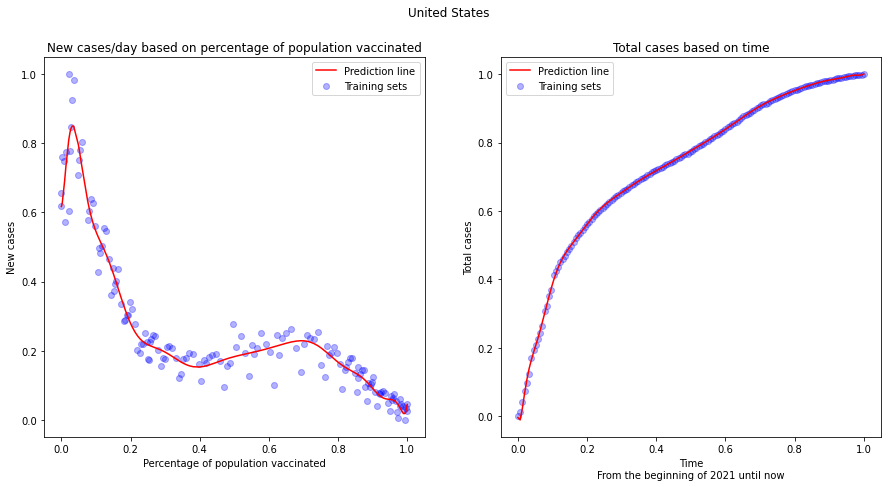

In [ ]:
usa = Prediction("United States")

After reaching a peak of 243352 new cases, it experienced a drastic drop to 76782 new cases, with 14,4% of people vaccinated. Then, it remained constant at approximately 72023 new cases, when the percentage of population vaccinated increased by 23%, followed by a slight drop to 24432 with 50.63% vaccinated. 
As the vaccinations became widespread and more and more effective, total cases in the USA had a gradual increase until now, despite a surge from 17955635 to 27790133 in the first month.


,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
42251,India,2021-01-15,15158.0,10542841.0,0.00,0
42252,India,2021-01-16,15144.0,10557985.0,0.01,1
42253,India,2021-01-17,13788.0,10571773.0,0.02,2
42254,India,2021-01-18,10050.0,10581823.0,0.03,3
42255,India,2021-01-19,13816.0,10595639.0,0.05,4
...,...,...,...,...,...,...
42392,India,2021-06-05,114460.0,28809339.0,13.11,136
42393,India,2021-06-06,100636.0,28909975.0,13.28,137
42394,India,2021-06-07,86498.0,28996473.0,13.44,138
42395,India,2021-06-08,92596.0,29089069.0,13.65,139


Maximum value of new cases per day:  414188.0
Minimum value of new cases per day:  8635.0
After one week, total cases of India will reach: 30775092 cases
After three months, total cases of India will reach: 38903814 cases
Accuracy of this prediction model: 99.91515209048977 %


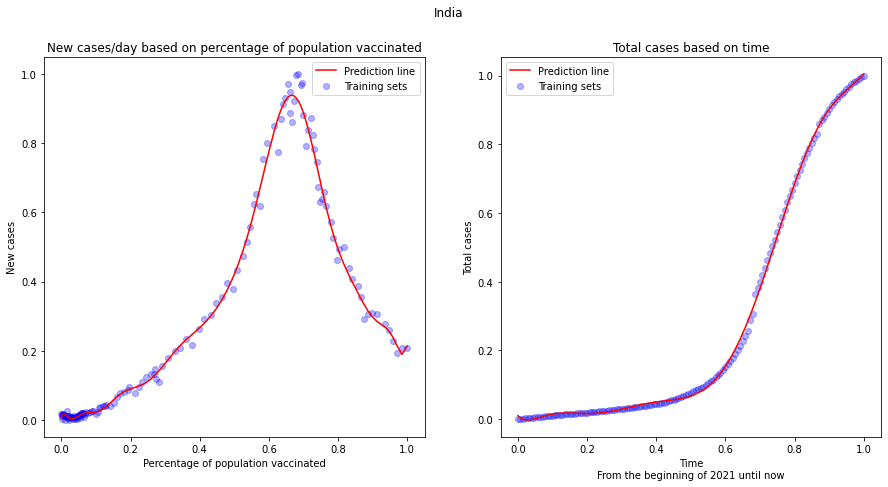

In [ ]:
india = Prediction("India")

A significant increase was observed in the number of new cases, which was from 15158 to 40397 cases per day, with 10.1% people vaccinated. However, after reaching that peak, the trend experienced a rapid drop to 110023 cases per day as the percentage of vaccinated increased up to 13.5%.
It is noticeable that in the first two months, the number of total cases in India saw a slight increase, hovering at 10599836 cases. Then, it leapt to 29182532 total cases, which nearly tripled the initial record, due to the appearance of the Delta variant which spread more easily and quickly.


,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
13208,Brazil,2021-01-16,61567.0,8455059.0,0.00,0
13209,Brazil,2021-01-17,33040.0,8488099.0,0.00,1
13210,Brazil,2021-01-18,23671.0,8511770.0,0.00,2
13211,Brazil,2021-01-19,62094.0,8573864.0,0.01,3
13212,Brazil,2021-01-20,64385.0,8638249.0,0.01,4
...,...,...,...,...,...,...
13346,Brazil,2021-06-03,83391.0,16803472.0,22.41,123
13347,Brazil,2021-06-04,37936.0,16841408.0,22.59,124
13348,Brazil,2021-06-05,66017.0,16907425.0,22.85,125
13349,Brazil,2021-06-06,39637.0,16947062.0,22.96,126


Maximum value of new cases per day:  100158.0
Minimum value of new cases per day:  0.0
After one week, total cases of Brazil will reach: 22656820 cases
After three months, total cases of Brazil will reach: 23275536 cases
Accuracy of this prediction model: 99.92413271073445 %


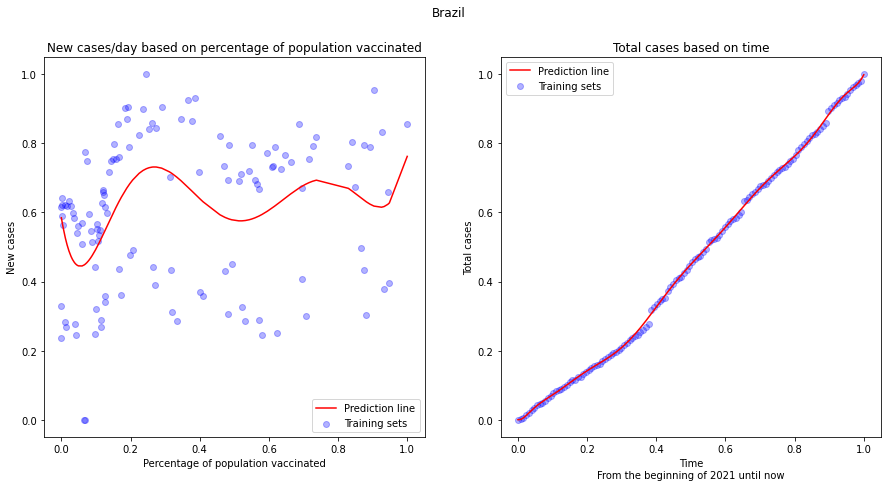

In [ ]:
brazil = Prediction("Brazil")

Overall, the number of new cases fluctuated even though the percentage of people vaccinated increased. 
At the beginning, after hitting the lowest point with 46740 new cases per day, it hit a peak of 74255  cases. Then, the line gained remarkable recovery at the highest point after a few fluctuations.
The appearance of the Gamma variant made the number of total cases still increased linearly, despite the endless effort of the government in preventing the quick spread of new variants.

### **b/ Korea, Japan, Vietnam**

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
85159,South Korea,2021-02-26,399.0,89321.0,0.04,0
85160,South Korea,2021-02-27,355.0,89676.0,0.04,1
85161,South Korea,2021-02-28,355.0,90031.0,0.04,2
85162,South Korea,2021-03-01,341.0,90372.0,0.05,3
85163,South Korea,2021-03-02,444.0,90816.0,0.18,4
...,...,...,...,...,...,...
85258,South Korea,2021-06-05,556.0,144152.0,14.82,99
85259,South Korea,2021-06-06,485.0,144637.0,14.83,100
85260,South Korea,2021-06-07,454.0,145091.0,16.58,101
85261,South Korea,2021-06-08,601.0,145692.0,18.03,102


Maximum value of new cases per day:  797.0
Minimum value of new cases per day:  341.0
After one week, total cases of South Korea will reach: 191833 cases
After three months, total cases of South Korea will reach: 198307 cases
Accuracy of this prediction model: 99.99748678815476 %


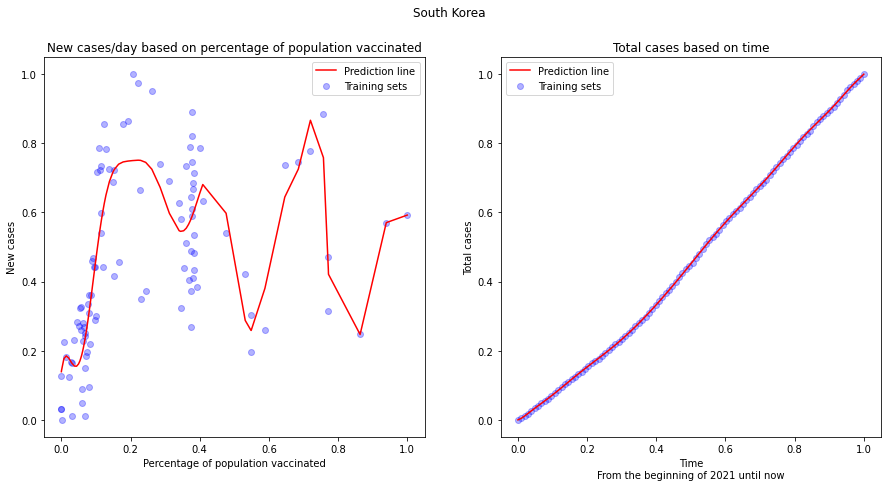

In [ ]:
korea = Prediction("South Korea")

According to the data that we have collected, the pandemic’s situation in South Korea has appeared to be in a tough spot since the beginning of 2021. The proportion of total cases has been increasing rapidly. Despite the growth of the number of people who got vaccinated, the increase rate of total cases does not seem to decline.

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
47026,Japan,2021-02-17,1461.0,419896.0,0.00,0
47027,Japan,2021-02-18,1525.0,421421.0,0.00,1
47028,Japan,2021-02-19,1297.0,422718.0,0.00,2
47031,Japan,2021-02-22,737.0,425725.0,0.01,3
47033,Japan,2021-02-24,904.0,427732.0,0.01,4
...,...,...,...,...,...,...
47134,Japan,2021-06-05,2663.0,760953.0,12.36,91
47135,Japan,2021-06-06,2027.0,762980.0,12.79,92
47136,Japan,2021-06-07,1205.0,764185.0,13.37,93
47137,Japan,2021-06-08,1883.0,766068.0,13.97,94


Maximum value of new cases per day:  7914.0
Minimum value of new cases per day:  621.0
After one week, total cases of Japan will reach: 1106450 cases
After three months, total cases of Japan will reach: 1153635 cases
Accuracy of this prediction model: 99.98953230315372 %


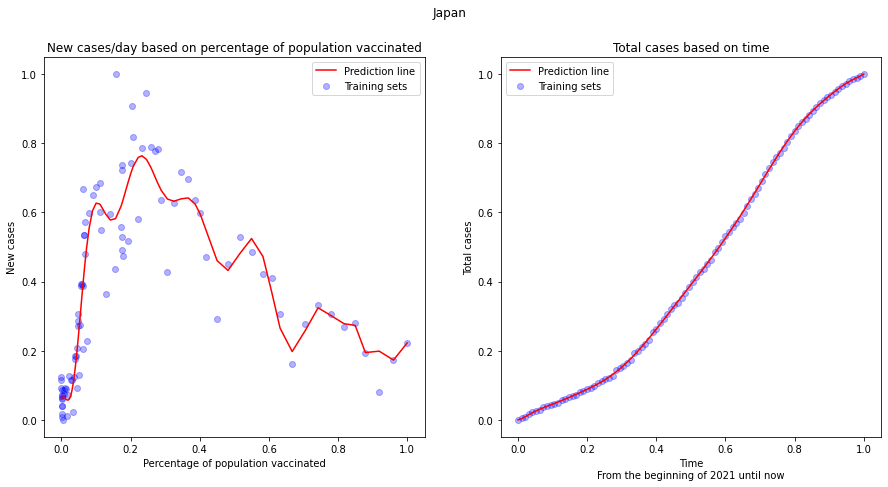

In [ ]:
japan = Prediction("Japan")

In contrast to Korea, the pandemic’s situation in Japan during the early days of 2021 seemed to be in a stable state where the total cases were increasing steadily. However, the situation became worse in mid-March when the total case per day began to increase considerably. During this time, the number of people who got vaccinated also had a major rise in proportion and the vaccine appeared to have a proper development.  That led to a drop in the number of new cases per day from the peak of 7914 new cases per day, putting the pandemic’s situation in Japan under control.

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
99157,Vietnam,2021-03-07,11.0,2512.0,0.00,0
99158,Vietnam,2021-03-08,12.0,2524.0,0.00,1
99159,Vietnam,2021-03-09,2.0,2526.0,0.00,2
99160,Vietnam,2021-03-10,3.0,2529.0,0.00,3
99161,Vietnam,2021-03-11,4.0,2533.0,0.00,4
...,...,...,...,...,...,...
99247,Vietnam,2021-06-05,216.0,8580.0,1.24,74
99248,Vietnam,2021-06-06,211.0,8791.0,1.25,75
99249,Vietnam,2021-06-07,236.0,9027.0,1.34,76
99250,Vietnam,2021-06-08,195.0,9222.0,1.35,77


Maximum value of new cases per day:  413.0
Minimum value of new cases per day:  0.0
After one week, total cases of Vietnam will reach: 10450 cases
After three months, total cases of Vietnam will reach: 11335 cases
Accuracy of this prediction model: 70.94820112530917 %


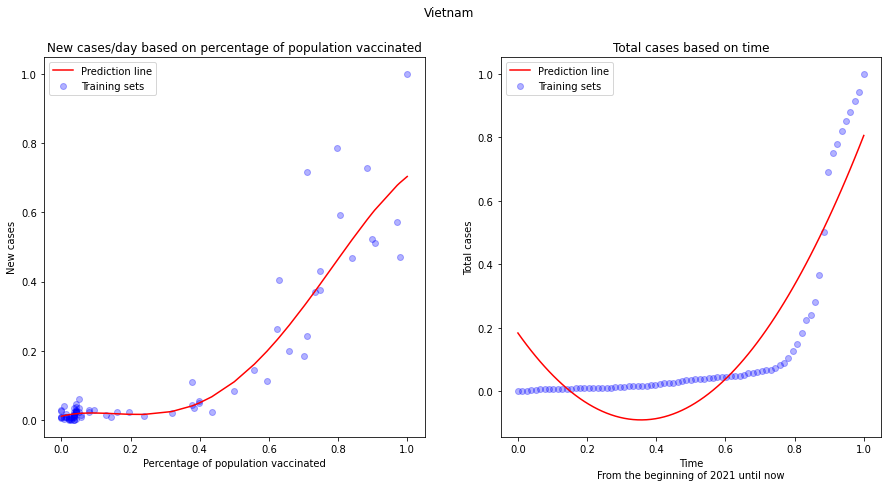

In [ ]:
vietnam = Prediction("Vietnam")

In Vietnam, the pandemic’s situation was under control in the early days of 2021 with approximately under 20 new cases per day. However, that was no longer the case in May. As we can see, the accuracy of this prediction is only 70%, much lower than the other region. This is because on the National Day at the end of April, lots of Vietnamese people decided to hang out and travel around, which led to the 4th pandemic outbreak in Vietnam. The sudden drastic increase in total cases causes the machine to hardly find a regression that best suits the pandemic situation of Vietnam. Moreover, the appearance of the new COVID-19 Delta variant also led to a significant increase in total cases. The number of new people getting infected per day went up to over 200 on average. Similar to Korea, the vaccine has not yet appeared to take effect in Vietnam, which leaves the condition of pandemic uncertain.

,location,date,new_cases,total_cases,people_vaccinated_per_hundred,days
16700,Canada,2020-12-14,8377.0,472820.0,0.00,0
16701,Canada,2020-12-15,6244.0,479064.0,0.00,1
16702,Canada,2020-12-16,6512.0,485576.0,0.01,2
16703,Canada,2020-12-17,7006.0,492582.0,0.02,3
16704,Canada,2020-12-18,6700.0,499282.0,0.03,4
...,...,...,...,...,...,...
16873,Canada,2021-06-05,1349.0,1398719.0,61.09,173
16874,Canada,2021-06-06,1374.0,1400093.0,61.61,174
16875,Canada,2021-06-07,1819.0,1401912.0,62.28,175
16876,Canada,2021-06-08,1071.0,1402983.0,62.72,176


Maximum value of new cases per day:  16141.0
Minimum value of new cases per day:  991.0
After one week, total cases of Canada will reach: 1691747 cases
After three months, total cases of Canada will reach: 1892216 cases
Accuracy of this prediction model: 99.9957779176295 %


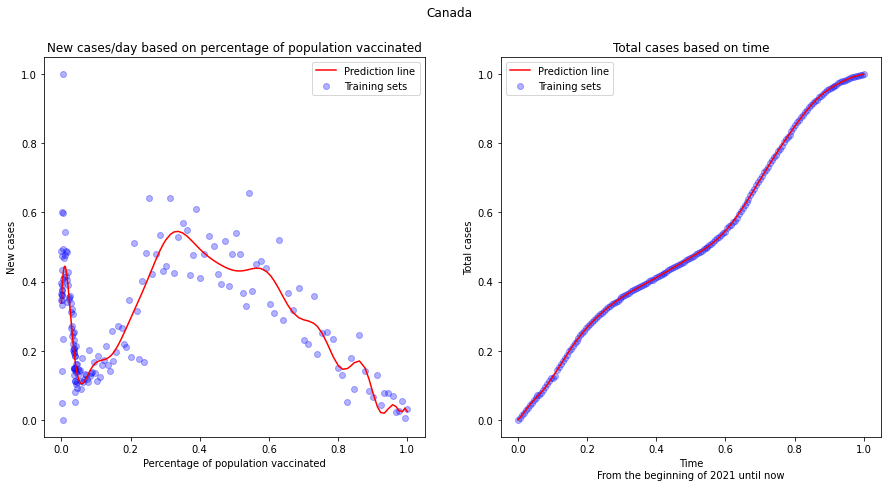

In [ ]:
can = Prediction('Canada')

# **4. Model analysis**

For model analysis, please read our full report document.